# 1. Tách xu hướng bằng phương pháp lọc trung bình trượt


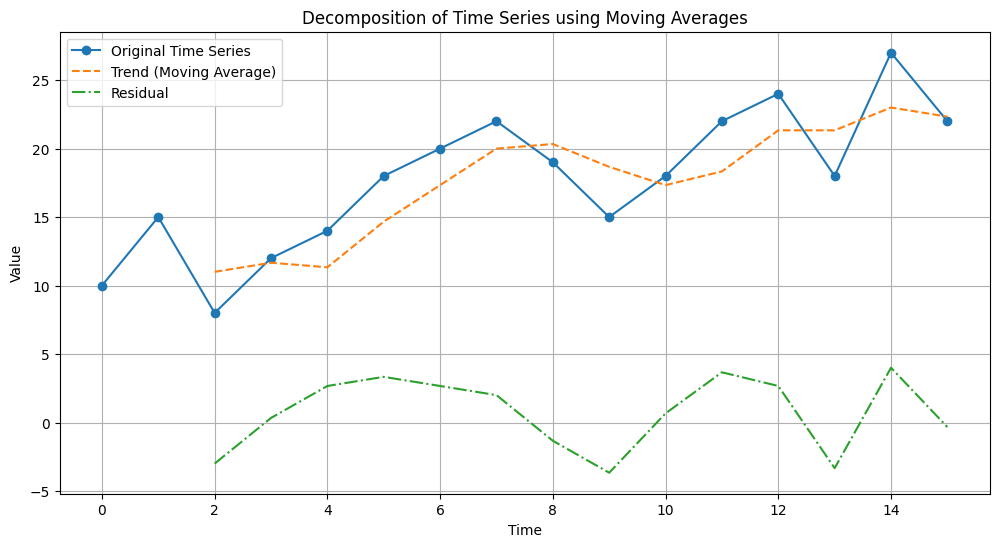

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a sample time series
data = pd.Series([10, 15, 8, 12, 14, 18, 20, 22,19, 15, 18, 22, 24, 18, 27, 22])

# Define the window size for the moving average
window_size = 3

# Calculate the moving average
moving_avg = data.rolling(window=window_size).mean()

# Calculate the trend component (moving average)
trend_component = moving_avg.dropna()

# Calculate the residual component
residual_component = data - trend_component

# Plot the original time series, moving average (trend), and residual
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Time Series', marker='o')
plt.plot(trend_component, label='Trend (Moving Average)', linestyle='--')
plt.plot(residual_component, label='Residual', linestyle='-.')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Decomposition of Time Series using Moving Averages')
plt.legend()
plt.grid(True)
plt.show()


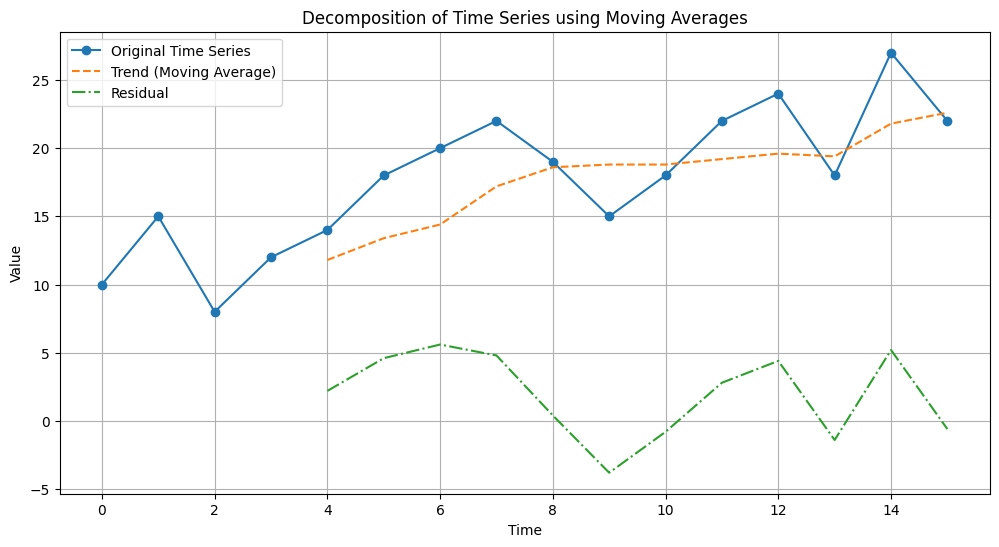

In [2]:
# Define the window size for the moving average
window_size1 = 5

# Calculate the moving average
moving_avg = data.rolling(window=window_size1).mean()

# Calculate the trend component (moving average)
trend_component1 = moving_avg.dropna()

# Calculate the residual component
residual_component1 = data - trend_component1

# Plot the original time series, moving average (trend), and residual
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Time Series', marker='o')
plt.plot(trend_component1, label='Trend (Moving Average)', linestyle='--')
plt.plot(residual_component1, label='Residual', linestyle='-.')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Decomposition of Time Series using Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

# 2. Phân tích mối quan hệ tách thành phần xu thế bằng các tham số khác nhau

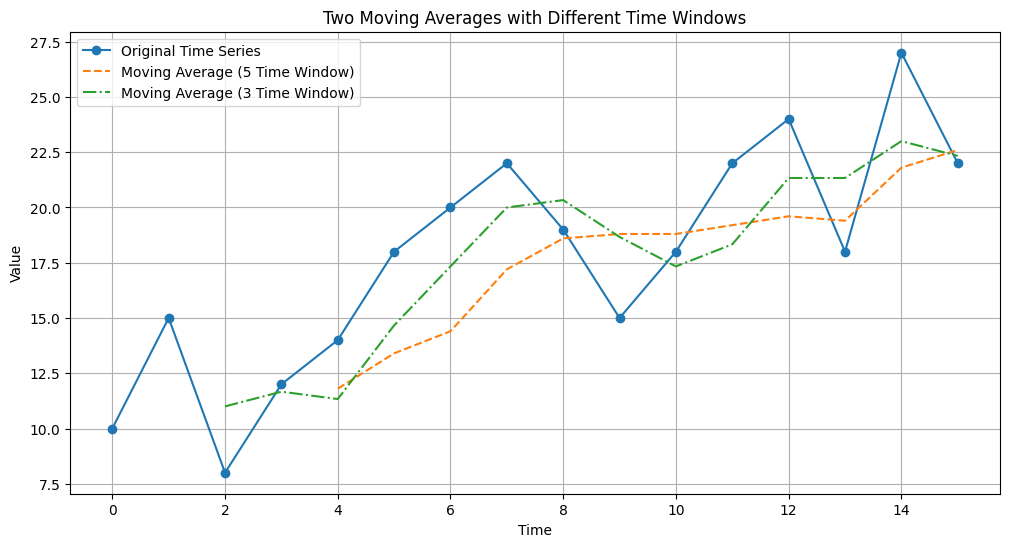

In [3]:
# Plot the original time series and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Time Series', marker='o')
plt.plot(trend_component1, label=f'Moving Average ({window_size1} Time Window)', linestyle='--')
plt.plot(trend_component, label=f'Moving Average ({window_size} Time Window)', linestyle='-.')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Two Moving Averages with Different Time Windows')
plt.legend()
plt.grid(True)
plt.show()


# 3. Mô phỏng chuỗi thời gian chứng khoán và cách phân tích tín hiệu mua bán dựa vào chuỗi thành phần xu thế

89


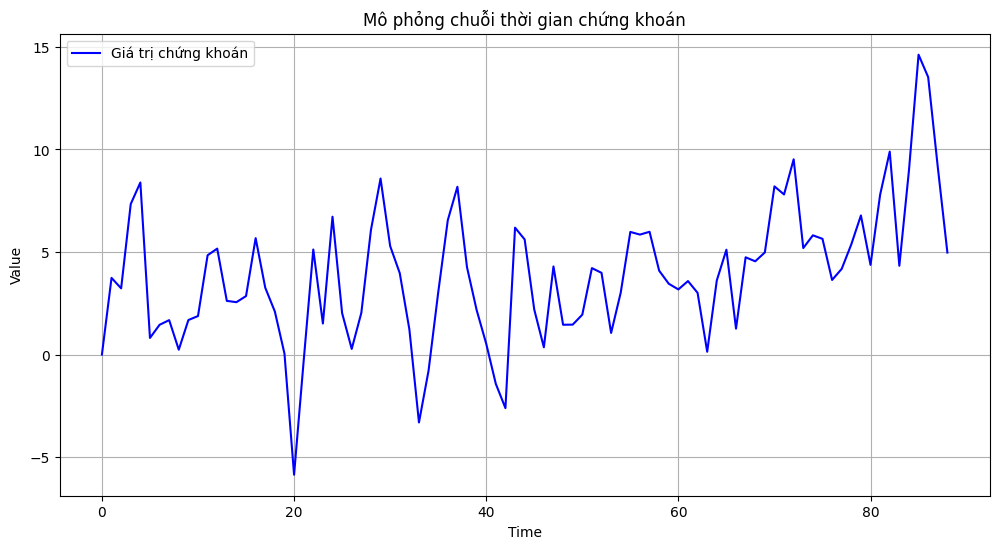

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate a date range
date_rng = pd.date_range(start='2023-01-01', end='2023-03-30', freq='D')

# Set random seed for reproducibility
np.random.seed(0)

# Parameters for the MA(1) model
n = len(date_rng)  # Number of data points
print(n)
mu = 0   # Mean
theta = 0.6  # MA coefficient (can be adjusted)

# Generate white noise (random errors)


sigma = 2.5 # Standard deviation

N=norm(mu, sigma)

Z= N.rvs(size=n)

# Generate MA(1) process
y = np.zeros(n)
for t in range(1, n):
    y[t] = 0.09*t+mu + Z[t] + theta * Z[t-1]

# Plot the simulated MA(1) data
plt.figure(figsize=(12, 6))
plt.plot(y, label='Giá trị chứng khoán', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Mô phỏng chuỗi thời gian chứng khoán')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import pandas as pd
import numpy as np

# Create a DataFrame with random stock prices
data = pd.DataFrame(date_rng, columns=['Date'])
data['Close'] = y

# Save the dataset to a CSV file
data.to_csv('stock_data.csv', index=False)


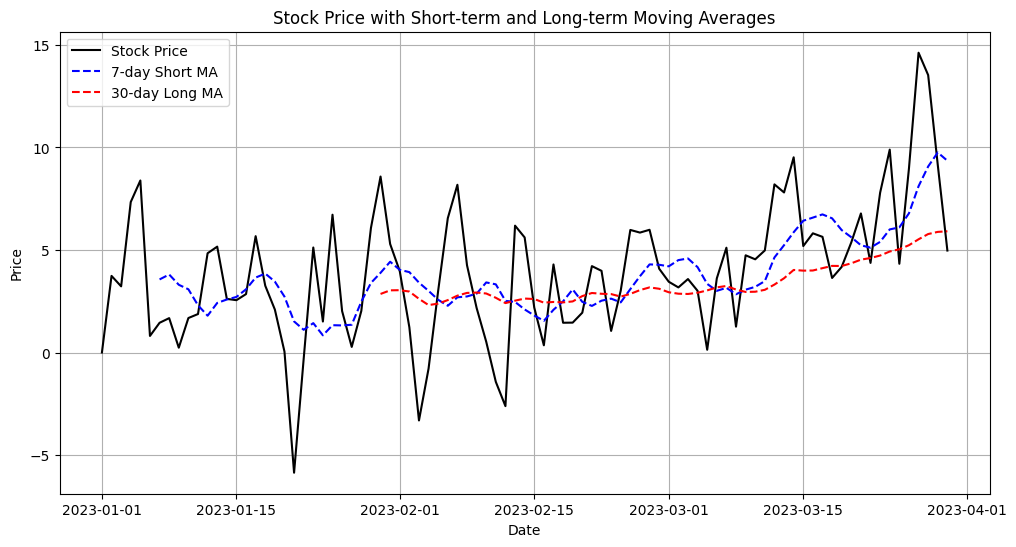

In [6]:
# Load historical stock price data into a DataFrame (replace 'stock_data.csv' with your data)
data = pd.read_csv('stock_data.csv')

# Convert the 'Date' column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Ensure the 'Close' column is numeric
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')

# Define parameters for moving averages
short_window = 7  # Short-term moving average window
long_window = 30  # Long-term moving average window

# Calculate short-term and long-term moving averages
data['Short_MA'] = data['Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Close'].rolling(window=long_window).mean()

# Plot the stock price, short-term MA, and long-term MA
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Stock Price', color='black')
plt.plot(data.index, data['Short_MA'], label=f'{short_window}-day Short MA', linestyle='--', color='blue')
plt.plot(data.index, data['Long_MA'], label=f'{long_window}-day Long MA', linestyle='--', color='red')

plt.title('Stock Price with Short-term and Long-term Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


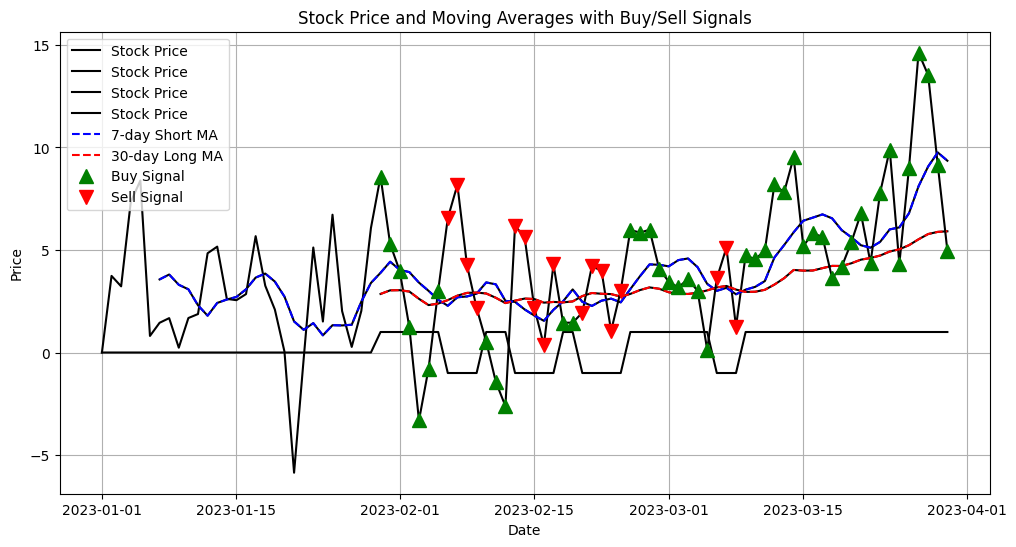

In [7]:
# Create signals based on crossovers
data['Signal'] = 0  # Initialize signal column with zeros
data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1  # Golden Cross: Short MA above Long MA
data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1  # Death Cross: Short MA below Long MA

# Plot the stock price and moving averages
plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Stock Price', color='black')
plt.plot(data.index, data['Short_MA'], label=f'{short_window}-day Short MA', linestyle='--', color='blue')
plt.plot(data.index, data['Long_MA'], label=f'{long_window}-day Long MA', linestyle='--', color='red')

# Highlight buy (green) and sell (red) signals
plt.plot(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['Close'], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['Close'], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('Stock Price and Moving Averages with Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Tách thành phần xu thế bằng phương pháp mũ


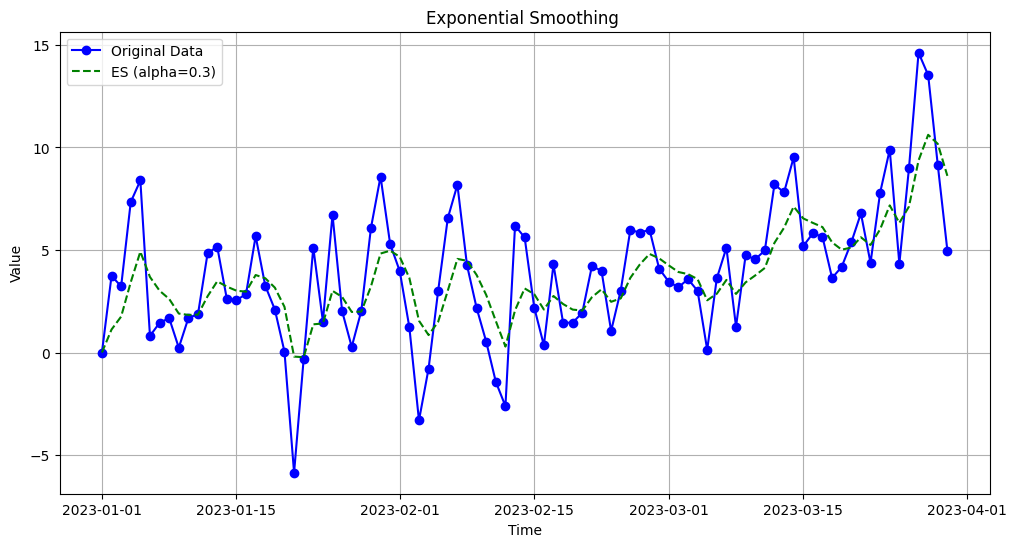

In [8]:
ETS = []
alpha=0.3

# Initialize the first level value with the first data point
ETS.append(data['Close'][0])

# Calculate the level component using the formula
for i in range(1, len(data)):
    m_hat = alpha * data['Close'][i] + (1 - alpha) * ETS[i - 1]
    ETS.append(m_hat)

# Plot the original data and the calculated level component
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Original Data', marker='o', color='blue')
plt.plot(data.index, ETS, label=f'ES (alpha={alpha})', linestyle='--', color='green')

plt.title('Exponential Smoothing ')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Bài tập code tuần 3
Lấy một chuỗi thời gian bất kỳ mà em quan tâm, tách ra thành phần xu thế  và phân tích việc ứng dụng chuỗi thành phần xu thế vào cuộc sống

# Tách thành phần xu thế

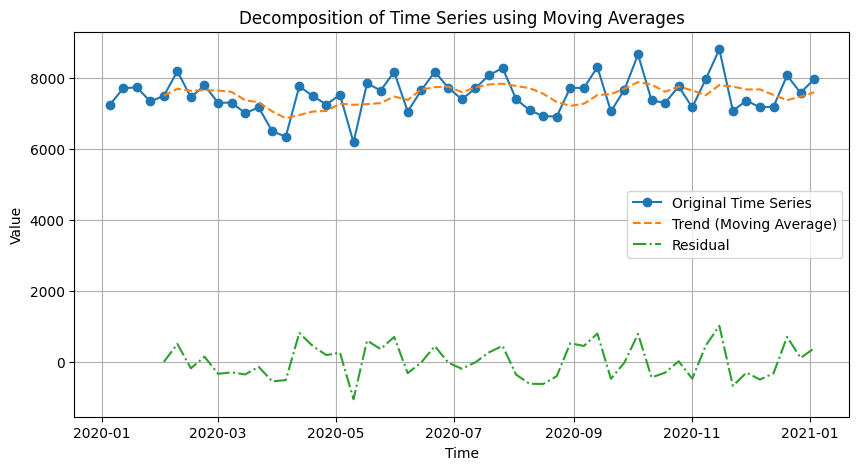

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load demand data
data = pd.read_csv('/content/drive/MyDrive/Chuỗi thời gian/Tuần 1/demand_forecast.csv')

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Set Date as index
data = data.set_index('Date')

# Resample data to weekly frequency
data = data.resample('W').mean()

# Calculate 5 week moving average
ma = data.rolling(window=5).mean()

# Extract trend
trend = ma.dropna()

# Extract residual
residual = data - trend

# Plot
plt.figure(figsize=(10,5))
plt.plot(data, label='Original Time Series', marker='o')
plt.plot(trend, label='Trend (Moving Average)', linestyle='--')
plt.plot(residual, label='Residual', linestyle='-.')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Decomposition of Time Series using Moving Averages')
plt.legend()
plt.grid(True)
plt.show()

Dữ liệu nhu cầu hàng ngày trong 1 năm (từ ngày 1/1/2020 đến ngày 31/12/2020) cho thấy nhu cầu biến động ngẫu nhiên, với giá trị trung bình là 7493 đơn vị và độ lệch chuẩn là 1132 đơn vị. Dữ liệu không thể hiện bất kỳ mô hình theo mùa (seasonality) mạnh mẽ nào hoặc xu hướng (trend) tăng hoặc giảm rõ ràng.

**Phân tích:**

**Nhu cầu thay đổi ngẫu nhiên:**
Giá trị nhu cầu dao động từ khoảng 5000 đến 10000 đơn vị mỗi ngày. Điều này cho thấy nhu cầu không tuân theo bất kỳ mô hình nào và có thể được coi là biến động ngẫu nhiên.

**Không có xu hướng theo thời gian:**
Dữ liệu nhu cầu đứng yên xung quanh giá trị trung bình trong suốt 1 năm. Điều này cho thấy không có xu hướng tăng hoặc giảm rõ ràng trong nhu cầu.
Nhu cầu dường như tuân theo phân phối chuẩn, với hầu hết các giá trị tập trung quanh giá trị trung bình và không có giá trị ngoại lệ.

**Kết luận:**

Việc thiếu tính thời vụ và xu hướng cho thấy các phương pháp dự báo cơ bản như đường trung bình động (moving average) có thể hoạt động tốt.